In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset

self_dr_car=pd.read_csv('driving_log.csv')
self_dr_car=self_dr_car.sample(1000) #As our data cotains 8036 instances and 7 columns so that to analyze this data set i have take only sample of 1000 instances 

self_dr_car

,center,left,right,steering,throttle,brake,speed
5495,IMG/center_2016_12_01_13_42_24_149.jpg,IMG/left_2016_12_01_13_42_24_149.jpg,IMG/right_2016_12_01_13_42_24_149.jpg,0.000000,0.985533,0.0,30.18662
6055,IMG/center_2016_12_01_13_43_20_883.jpg,IMG/left_2016_12_01_13_43_20_883.jpg,IMG/right_2016_12_01_13_43_20_883.jpg,0.023486,0.985533,0.0,30.18620
5585,IMG/center_2016_12_01_13_42_33_260.jpg,IMG/left_2016_12_01_13_42_33_260.jpg,IMG/right_2016_12_01_13_42_33_260.jpg,0.000000,0.985533,0.0,30.18661
117,IMG/center_2016_12_01_13_32_50_121.jpg,IMG/left_2016_12_01_13_32_50_121.jpg,IMG/right_2016_12_01_13_32_50_121.jpg,0.000000,0.985533,0.0,30.18692
467,IMG/center_2016_12_01_13_33_25_551.jpg,IMG/left_2016_12_01_13_33_25_551.jpg,IMG/right_2016_12_01_13_33_25_551.jpg,0.000000,0.985533,0.0,30.18609
...,...,...,...,...,...,...,...
1077,IMG/center_2016_12_01_13_34_27_388.jpg,IMG/left_2016_12_01_13_34_27_388.jpg,IMG/right_2016_12_01_13_34_27_388.jpg,0.000000,0.985533,0.0,30.18636
6732,IMG/center_2016_12_01_13_44_29_584.jpg,IMG/left_2016_12_01_13_44_29_584.jpg,IMG/right_2016_12_01_13_44_29_584.jpg,0.000000,0.985533,0.0,30.18727
6664,IMG/center_2016_12_01_13_44_22_700.jpg,IMG/left_2016_12_01_13_44_22_700.jpg,IMG/right_2016_12_01_13_44_22_700.jpg,0.000000,0.985533,0.0,30.18664
6679,IMG/center_2016_12_01_13_44_24_219.jpg,IMG/left_2016_12_01_13_44_24_219.jpg,IMG/right_2016_12_01_13_44_24_219.jpg,-0.012285,0.985533,0.0,30.18658


In [3]:
# DATA_SHAPE
print(self_dr_car.shape)
rows,cols = self_dr_car.shape
print("Number of rows : ",rows) #instances 
print("Number of Cols: ",cols) #series 


(1000, 7)
Number of rows :  1000
Number of Cols:  7


In [4]:
# DATA STRUCTURES

self_dr_car.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2752 to 7621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center    1000 non-null   object 
 1   left      1000 non-null   object 
 2   right     1000 non-null   object 
 3   steering  1000 non-null   float64
 4   throttle  1000 non-null   float64
 5   brake     1000 non-null   float64
 6   speed     1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 62.5+ KB


In [5]:
# FINDING MISSING VALUES 
self_dr_car.isnull().sum()


center      0
left        0
right       0
steering    0
throttle    0
brake       0
speed       0
dtype: int64

In [6]:
self_dr_car.describe()

,steering,throttle,brake,speed
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001880,0.884595,0.002538,28.479010
std,0.118540,0.281572,0.046263,5.677464
min,-0.505992,0.000000,0.000000,0.528523
25%,0.000000,0.985533,0.000000,30.183455
50%,0.000000,0.985533,0.000000,30.186450
75%,0.000000,0.985533,0.000000,30.186640
max,0.492344,0.985533,1.000000,30.203420


<AxesSubplot:xlabel='steering', ylabel='Count'>

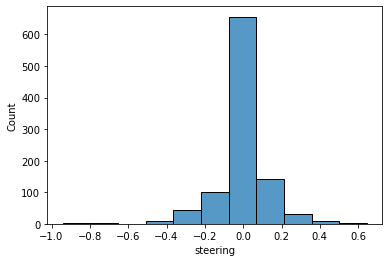

In [2]:
sns.histplot(self_dr_car['steering'])

In [4]:
self_dr_car['steering'].agg(['skew','kurtosis'])




skew       -0.621652
kurtosis    6.663585
Name: steering, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed'>

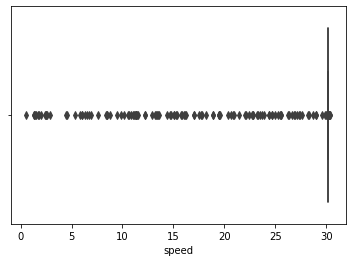

In [7]:
sns.boxplot(self_dr_car['speed'])

In [4]:
corr = self_dr_car.corr(method="pearson") #you can use spearmean if you want 
corr

,steering,throttle,brake,speed
steering,1.000000,-0.065245,-0.034831,-0.058835
throttle,-0.065245,1.000000,-0.222350,0.834727
brake,-0.034831,-0.222350,1.000000,-0.175568
speed,-0.058835,0.834727,-0.175568,1.000000


<AxesSubplot:>

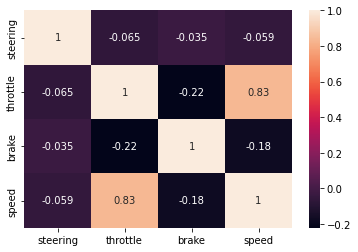

In [5]:
sns.heatmap(corr,annot=True)

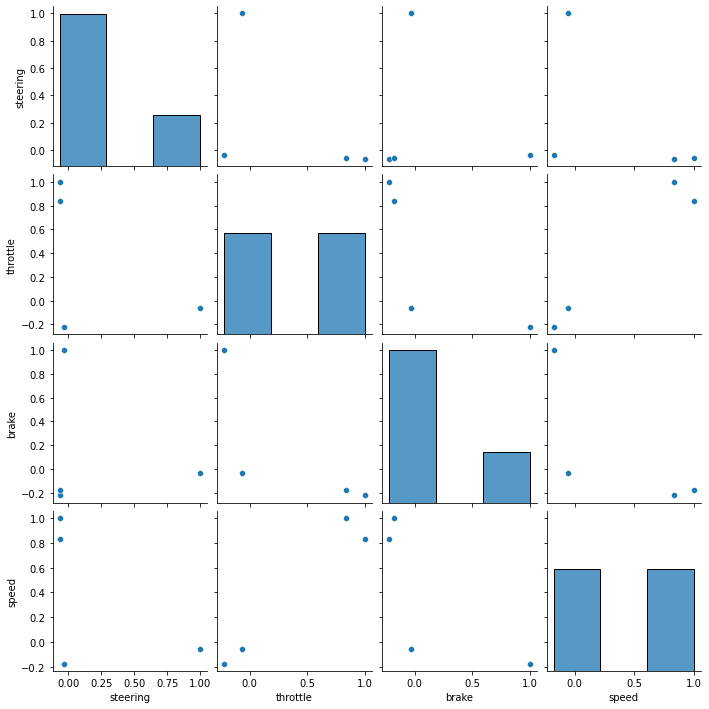

In [6]:
sns.pairplot(corr)